<a href="https://colab.research.google.com/github/aadarshraghunathan/MD/blob/main/NVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
class parameters:
  k = 5 
  A = 10 
  dt = 0.01
  m = 1
  q0 = A
  p0 = 0
  num_steps = 1000



In [ ]:
def force(x):
  return -parameters.k*x

def x_next(x,p):
  f = force(x)
  return (x + (p/parameters.m)*parameters.dt + ((f/2*parameters.m)*(parameters.dt**2)))

def p_next(x,x_next,p):
  force1 = force(x)
  force2 = force(x_next)
  return (p + ((parameters.dt/2)*(force1 + force2)))

def Hamiltonian(x,p):
  return ((p**2)/(2*parameters.m) + 1/2*parameters.k*(x**2))




In [ ]:
position = [parameters.q0]
momentum = [parameters.p0]
H = [1/2*parameters.k*(parameters.A**2)]
time = [0]
t = 0
count = 0 
while(count < parameters.num_steps):
  t+=parameters.dt 
  time.append(t)
  new_position = x_next(position[count],momentum[count])
  position.append(new_position)
  new_momentum = p_next(position[count],position[count+1],momentum[count])
  momentum.append(new_momentum)
  new_H = Hamiltonian(new_position,new_momentum)
  H.append(new_H)
  count+=1


(0.0, 1000.0)

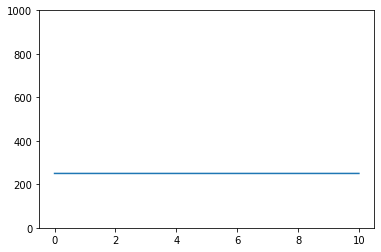

In [ ]:

plot(time,H)
ylim(0,1000)


Text(0.5, 0.92, 'simple 3D scatter plot')

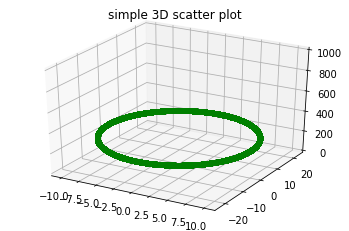

In [ ]:
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(position,momentum,H, color = "green")
ax.set_zlim3d(0,1000)
plt.title("simple 3D scatter plot")